# Projet Data Analyse -  Lucie CALEM - 30/04/2021
# Dataset : healthcare-dataset-stroke-data
# Sujet : La Prédiction des AVC 
# Problématique : Quels pourraient être les facteurs qui favorisent un AVC ?

Les AVC représentent la deuxième cause de mortalité dans le monde d'après l'OMS (Organisation Mondiale de la Santé). **Il serait intéressant de pouvoir prédire si un patient est susceptible d'avoir un accident vasculaire cérébral en fonction de ses paramètres d'entrées.**

Import des librairies et lecture du dataset: 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

dt = pd.read_csv('../content/healthcare-dataset-stroke-data.csv')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dt

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

In [ ]:
dt.shape

(5110, 12)

On constate qu'il y a 5 110 lignes pour 12 colonnes. Cela veut dire que notre échantillon est sur 5 110 personnes identifiées par plusieurs variables que représentent les colonnes.

Seule la variable BMI (IMC en français) à des données manquante.

Voici ce que veut dire les colonnes :
- id : un identifiant unique
- gender : le genre de la personne, il peut être Male (Homme) ou Female (Femme) ou Other (Autre)
- age : l'âge de la personne
- hypertension : l'hypertension, correspond à une pression sanguine anormalement forte dans les artères. Ici, 0 signifie que le patient n'a pas d'hypertension et 1 signifie qu'il a de l'hypertension.
- heart_disease : Il existe plusieurs types de maladie cardiaque (malformation, un apport de sang insuffisant ou un dysfonctionnement du muscle ou des valves cardiaques) Ici on identifie par 0 le fait que le patient n'a aucune maladie cardiaque et par 1 le fait qu'il en ait au moins une.
- ever_married : signifie que le patient a déjà été marié (il peut ne pas l'être actuellement). No signifie que le patient n'a jamais été marié et Yes signifie que le patient a déjà été marié.
- work_type: indique quel type de travail le patient fait : "children" pour enfant, "Govt_job" pour un emploi gouvernemental, "Never_worked" pour n'a jamais travailler, "Private" pour travail dans le priver et "Self-employed" pour indépendant.
- Residence_type: pour savoir dans quel type d'environnement vit le patient "Rural" ou "Urban"
- avg_glucose_level: pour le taux de glucose (sucre) moyen dans le sang.
- bmi: c'est l'indice de masse corporelle.
- smoking_status: c'est pour savoir si le patient fume, il y "formerly smoked" pour les anciens fumeurs, "never smoked" pour les personnes n'ayant jamais fumé, "smokes" pour les fumeurs et "Unknown" pour les personnes qui n'ont pas voulu/pu répondre.
- stroke: les AVC sont ici identifié par 1 si le patient a fait un AVC et par 0 s'il n'en a pas fait. Cette colonne correspondra au label pour le reste de notre analyse.

# La première hypothèse que nous pouvons faire est : le fait d'être un homme ou une femme est-il un facteur qui favorise les AVC ?


In [ ]:
dt['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

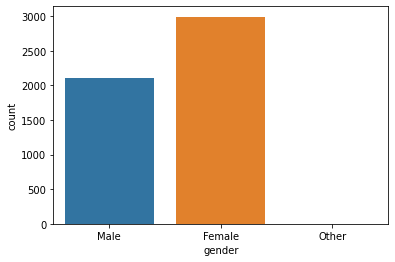

In [ ]:
#regarde en graphique le value_counts() pour mieux visualisé les données
sns.countplot(data=dt,x='gender')

In [ ]:
f = 2994/5110*100;
f


58.590998043052835

In [ ]:
h= 2115/5110*100;
h

41.3894324853229

On constate que dans notre échantillon il y a plus de femme (2994 soit 58.59%) que d'homme (2115 soit 41.39% ) et que les personnes identifier comme Other représente une infime partie de l'échantillon 1. Ce qui veut dire que **notre échantillon n'est pas vraiment représentatif de la population mondiale où le ratio est de 50,4 % d'homme et 49.6 % de femmes.**
source : https://information.tv5monde.com/terriennes/77-milliards-d-etres-humains-mais-combien-de-femmes-2547 

In [ ]:
#on enleve la section Other qui est une donnée non pertinante
dt = dt.loc[dt["gender"] != 'Other']

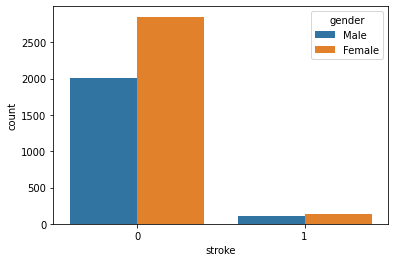

In [ ]:
sns.countplot(x=dt["stroke"], hue=dt["gender"])

Grâce à ce graphique, on pourrait émettre l'hypothèse que le genre féminin favorise les AVC puis que les femmes ont plus fait d'AVC que les hommes. Ceci n'est pas du tout représentatif, car le nombre de femmes sur l'échantillon est plus important que le nombre d'hommes.

In [ ]:
#On convertire Male Female en 0 1  pour utiliser les données 
dt["gender"] = dt["gender"].replace(to_replace="Female", value=1).replace(to_replace="Male", value=0)
dt.gender.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    5109.000000
mean        0.586025
std         0.492592
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

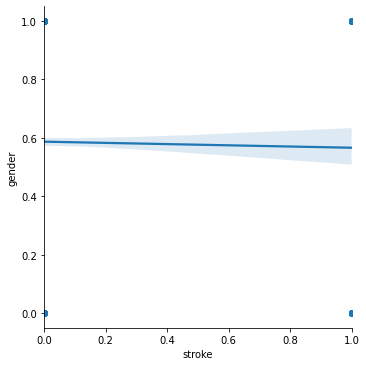

In [ ]:
#construction d'un graphique pour voir la tendance moyenne
sns.lmplot(data=dt, x="stroke", y="gender")

On constate une légère diminution de la tendance moyenne qui commence à 0.58 sur 1 avec une variance moyenne très élargie (environ + ou -0.05). **Ce qui nous permet d'émettre l'hypothèse qu'être une femme favorise les chances d'avoir un AVC.**

Mais comme notre échantillon comporte plus de femme que d'homme, comme vue précédemment, la moyenne est donc au-dessus de 0.5 mais celle-ci n'est pas représentative puisque dans le monde, la répartition est d'environ 50/50. De plus, la variance est de 0.49 donc la moyenne n'est vraiment pas fiable par rapport à notre échelle (0 à 1) donc je pense qu'aux vues de ses informations, la donnée sur le genre n'est pas représentative et donc qu'on ne peut conclure une réel corrélation que le genre est un réel facteur favorisant les AVC.


# Notre deuxième hypothèse est sur le tabagisme, est-ce un facteur qui peut augmenter les AVC ? 

In [ ]:
dt['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

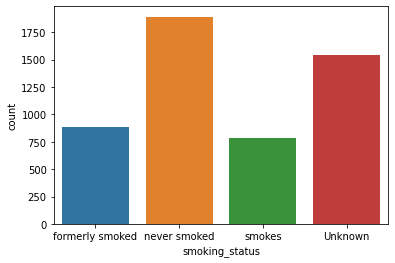

In [ ]:
#regarde en graphique le value_counts() pour mieux visualiser les données
sns.countplot(data=dt,x='smoking_status')

On constate qu'une majorité de personne n'est pas fumeur, mais qu'il y a **beaucoup de personne qui n'ont pas donnée l'information, ce qui peut potentiellement biaiser nos conclusions.** Nous allons donc enlever toutes les personnes qui n'ont pas répondu.

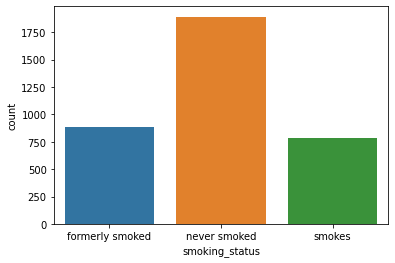

In [ ]:
#On filtre les personnes qui n'ont pas répondu 
dt=dt[dt['smoking_status']!="Unknown"]
sns.countplot(data=dt,x='smoking_status')

On va changer les valeurs de smokes et formerly smoked pour qu'elles ne fassent plus qu'une seule valeur (des fumeurs) et pour qu'on puisse les utilisés :
- 0 = non fumeur 
- 1 = fumeur




In [ ]:
dt.smoking_status.describe()

count             3565
unique               3
top       never smoked
freq              1892
Name: smoking_status, dtype: object

In [ ]:
dt["smoking_status"] = dt["smoking_status"].replace(to_replace="smokes", value=1).replace(to_replace="formerly smoked", value=1).replace(to_replace="never smoked", value=0);
dt.smoking_status.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    3565.000000
mean        0.469285
std         0.499126
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: smoking_status, dtype: float64

On constate que notre échantillon est passé de 5 110 à 3 566, nous avons donc **perdu 1544 lignes, soit un peu plus d'1/5 de notre échantillon**. La **moyenne n'est pas donc pas représentative**, de plus l'écart-type est plus grand que la moyenne ce qui **biaise notre analyse.**

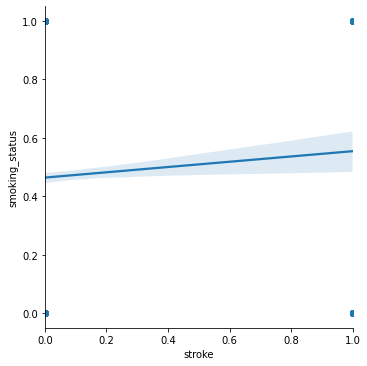

In [ ]:
#construction d'un graphique pour voir la tendance moyenne
sns.lmplot(data=dt, x="stroke", y="smoking_status")

On constate une augmentation de la tendance moyenne (ligne bleue) avec une variance moyenne (espace bleu clair) qui s'élargit grandement plus on tend vers la valeur 1 donc les cas d'AVC.
**On peut donc émettre l'hypothèse que le tabagisme (actuel ou passé) augment les chances de faire un AVC.**

Il faut tout de même prendre en compte que **la moyenne et l'écart-type ne sont pas complémente représentatif de l'échantillon** (4/5 car nous avons enlever les valeurs unknown) comme vue ci-dessus.

# Hypothès numéro 3 : est-ce que l'âge du patient est un facteur favorisant les AVC ? 

In [ ]:
dt = pd.read_csv('../content/healthcare-dataset-stroke-data.csv')

In [ ]:
dt.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


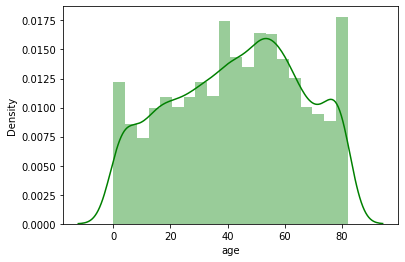

In [ ]:
sns.distplot(dt.age, color="g")

On remarque que sur l'échantillon total, la répartition de l'âge est plutôt homogène, une moyenne a 43 ans pour un écart-type de 22, donc la majorité des gens ont entre 21 ans et 65 ans. La moyenne est assez représentative de la population étudiée, car la médiane (45) est proche de la moyenne (43).



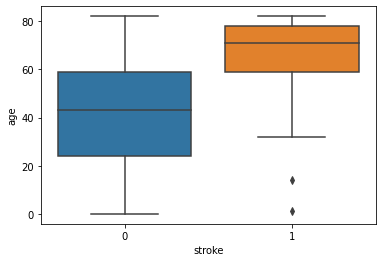

In [ ]:
#boite à moustache
sns.boxplot(data=dt,x="stroke",y="age") 

On constate des données absurdes aux niveaux des AVC chez des personnes jeunes, nous allons donc les enlever.

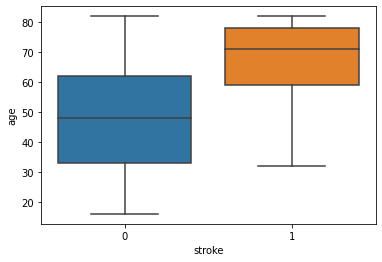

In [ ]:
#boite à moustache
sns.boxplot(data=dt[dt["age"]>15],x="stroke", y="age") 

Grâce à se graphique, on peut poser l'hypothèse que l'âge est un facteur qui favorise les AVC. **Plus le patient est agé plus il risque d'avoir un AVC,** car la médiane d'âge des patients qui ont fait un AVC est de 70 ans, comparer à une médiane d'âge inférieur à 50 ans pour ce qui n'ont pas fait d'AVC.

# Hypothese numéro 4 : est ce que le taux de glucide (sucre) dans le sang est un facteur favorisant les AVC ? 

Le glucose est le principal carburant de notre organisme. C'est un sucre simple qui se transforme en gras ou en glycogène pour être stocké dans les muscles. En français, le taux de glucose dans le sang est la glycémie. Le taux normal à jeun est entre 70 et 90mg/dl et augmente en fonction de ce que l'on mange. Le souci des diabétiques est que la régulation de la glycémie n'est pas fonctionnelle, car l'insuline ne fonctionne pas.

In [ ]:
dt.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Regardons la répartition de ces taux selon l'âge du patient : 

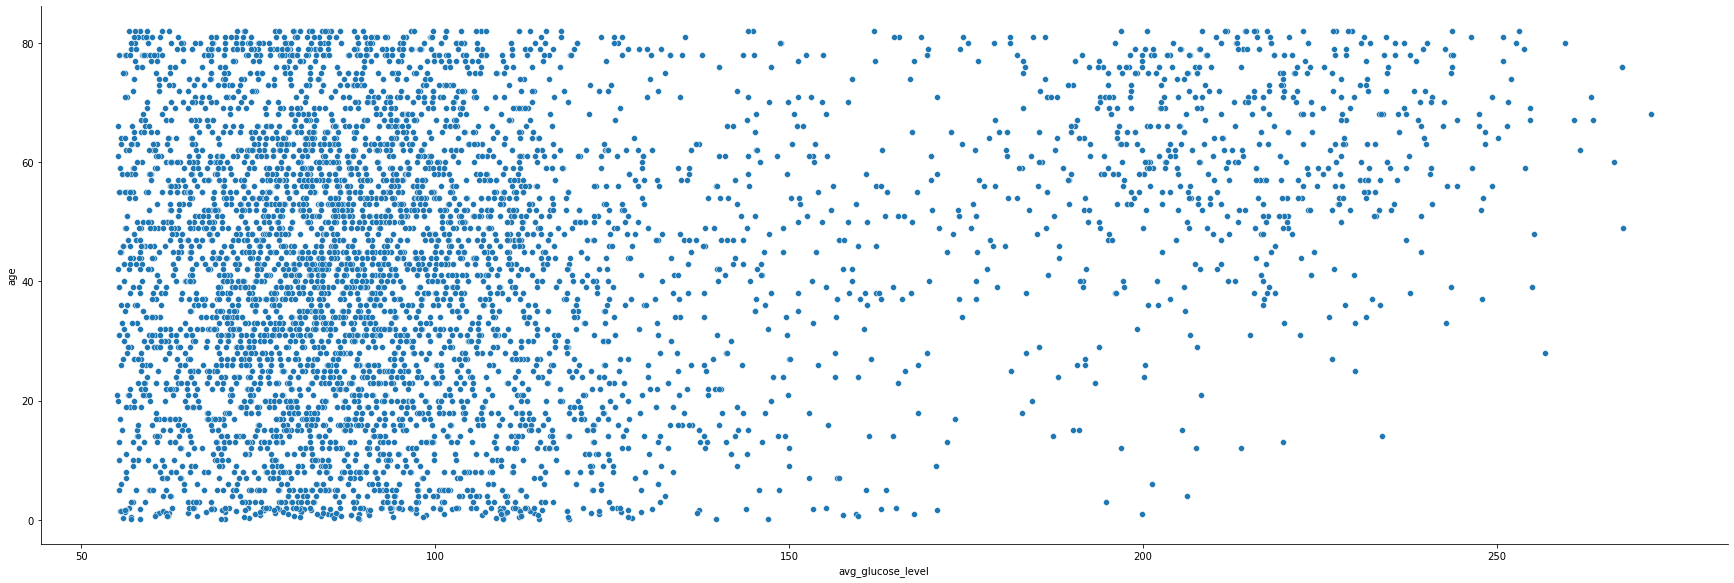

In [ ]:
#construction d'un graphique pour voir la répartition entre l'age et le taux de glucose dans le sang 
sns.relplot(data=dt,x="avg_glucose_level", y="age",height=8, aspect=3)

Comme il y a **beaucoup trop de donnée** et que cela n'est pas très lisible, nous allons prendre 50 données aléatoires représentatives de l'échantillon 

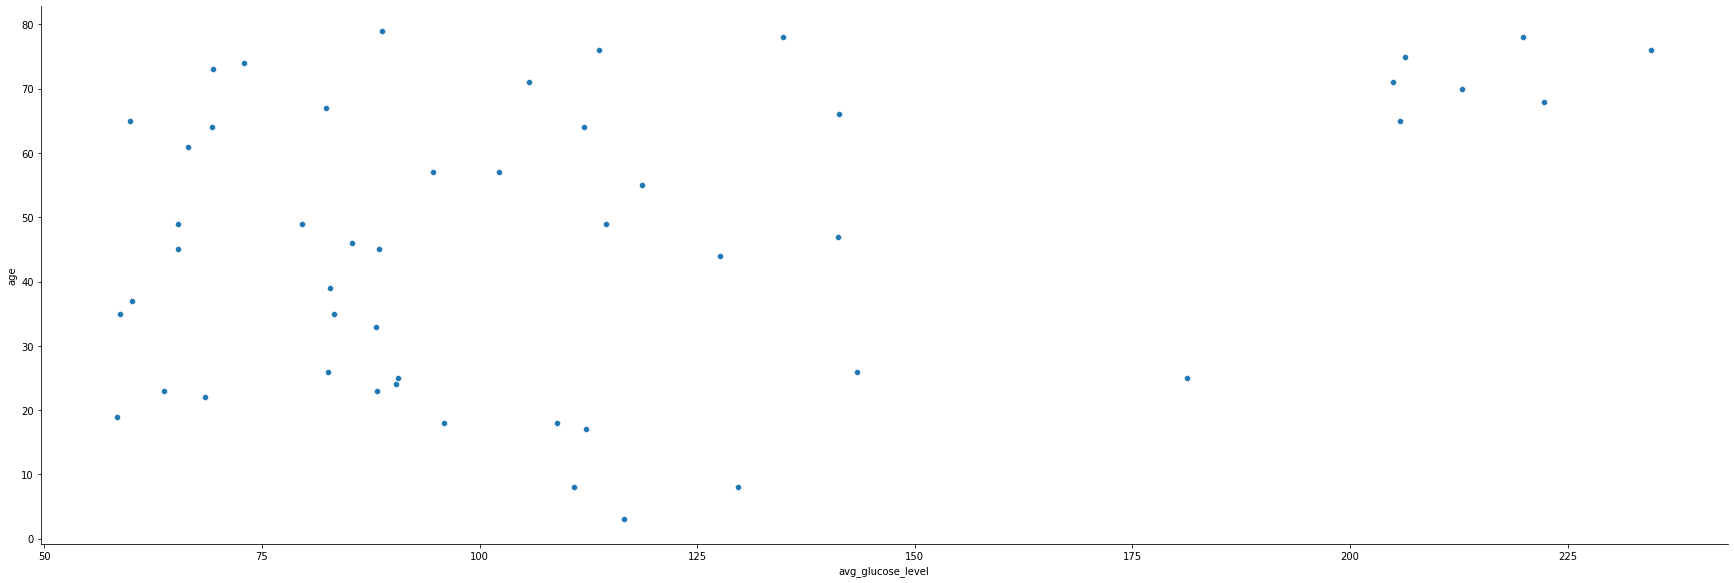

In [ ]:
#construction d'un graphique pour voir la répartition entre l'age et le taux de glucose dans le sang avec 50 éléments représentatifs
sns.relplot(data=dt.sample(50), x="avg_glucose_level", y="age", height=8, aspect=3)

On peut constater que la majorité des points se situe entre 60 et 125, ce qui peut être normal, car nous n'avons pas de détail sur quand et dans quelles conditions ses taux, on été obtenue. **Il faudrait avoir plus de détail** comme est-ce que le patient était-il à jeun ou avait-il déjà mangé ? Quant à été prélever l'échantillion le matin ou le soir?d Le patient est diabétique ou non ?
Quelques points sont plus haut que la normale ( > à 150) ce qui pourrait dire que ces personnes sont diabétiques ou qu'elles viennent de manger. L'information sur le diabète aurait pu être importante pour notre recherche.

De plus on constate aussi que les taux au dessus de 200 sont plus fréquent chez les personnes agées de plus de 50 ans. En effet d'après les données de santé public france l'age moyen des personnes diabétique est de 65 asn et que un quart des personnes sont âgées de 75 ans ou plus.
On peut donc posé l'hypothèse que les points au dessus de 200 pour les personnes agées de plus de 50 ans sont liée à une augmentation du diabéte chez les sujets.

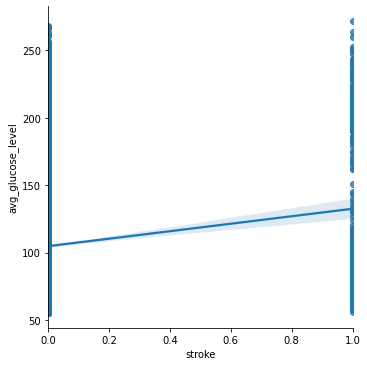

In [ ]:
#construction d'un graphique pour voir la tendance moyenne
sns.lmplot(data=dt, x="stroke", y="avg_glucose_level")

On observe que la tendance augmente et que la variance s'élargit lorsque l'on se rapproche de 1, des cas qui ont fait un AVC, **ce qui nous permet d'émettre l'hypothèse que plus le taux de glucose dans le sang est élevé plus il y a de chance de faire un AVC.**

Mais comme vue précédemment, nous ne savons pas quand les relever des taux ont été fait ni les conditions (à jeun ou pas) des patients, nous ne savons pas non plus si les forts taux de glucose ne sont pas lié à un diabète.**L'analyse est donc biaisé par ses nombreuses inconnues.**

# Hypothese numéro 5 : est ce que l'indice de masse corporel est un facteur favorisant les AVC ? 

Voici ce que signifient les chiffres de l'IMC selon l'OMS :
- moins de 18,5 Insuffisance pondérale (maigreur)
- 18,5 à 25 : Corpulence normale
- 25 à 30 : Surpoids
- 30 à 35 : Obésité modérée
- 35 à 40 : Obésité sévère
- plus de 40 : Obésité morbide ou massive

In [ ]:
dt.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Comme vue au début de ce projet, la donnée sur bmi contient des données manquantes. 4 909 à la place de 5 110.
On remarque que la moyenne (28.8) est représentative, car la médiane (28.1) est très proche d'elle. De plus, l'écart-type (7) n'est pas très élevé sur cette échelle (10-97),**ce qui veut dire que l'indice de masse corporelle se trouve entre 21 et 35 pour notre échantillon, donc une corpulence moyenne à en surpoids.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


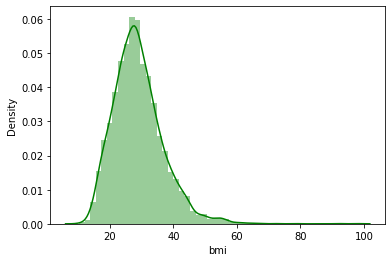

In [ ]:
#construction de la distribution de l'imc 
sns.distplot(dt.bmi, color="g")

On constate grâce à ce graphique que la courbe de l'IMC représente bien **une loi normal, avec une bosse indiquant la moyenne, ce qui signifie une bonne répartition des données.**Les cas absurdes qui sont au-dessus du 60 ne biaise pas forcément le graphique vu qu'il représente moins de 5 % des cas. Regardons, ce que cela donne si on les enlève : 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


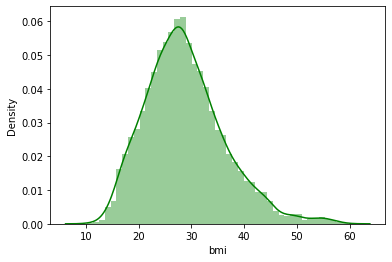

In [ ]:
#construction de la distribution de l'imc avec valeur < 60
sns.distplot(dt.bmi[dt.bmi < 60], color="g")

Le graphique est un peu plus étalé, mais il a toujours cet **aspect en cloche et suit donc toujours la loi normal.**

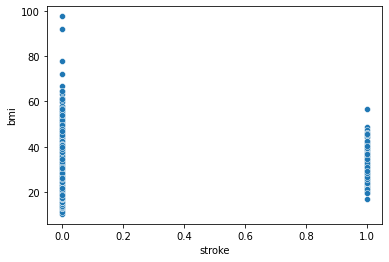

In [ ]:
#construction d'une scatterplot
sns.scatterplot(data=dt, x="stroke", y="bmi")

On observe que les cas qui ont eu un AVC avaient entre 20 et 60 d'IMC, et que les personnes au-dessus de 60 et en dessous de 20 dans notre échantillon n'ont pas fait fait d'AVC justement. **On peut donc penser que l'IMC (faible ou élevé) n'est pas un facteur favorisant les AVC.**

In [ ]:
a = dt.loc[(dt['bmi']<=20),:]
a.describe()

id         age  ...         bmi      stroke
count    537.000000  537.000000  ...  537.000000  537.000000
mean   36517.400372   13.935196  ...   17.604655    0.005587
std    20518.280724   18.984746  ...    1.721657    0.074604
min       77.000000    0.080000  ...   10.300000    0.000000
25%    18070.000000    3.000000  ...   16.500000    0.000000
50%    36087.000000    7.000000  ...   17.900000    0.000000
75%    53943.000000   13.000000  ...   18.900000    0.000000
max    72940.000000   82.000000  ...   20.000000    1.000000

[8 rows x 7 columns]

In [ ]:
b = (dt.loc[(dt['bmi']>=60),:])
b.describe()

id        age  ...        bmi  stroke
count     13.000000  13.000000  ...  13.000000    13.0
mean   43307.692308  42.230769  ...  69.507692     0.0
std    27980.387397  14.827642  ...  12.360587     0.0
min      545.000000  17.000000  ...  60.200000     0.0
25%    20292.000000  27.000000  ...  61.200000     0.0
50%    51856.000000  51.000000  ...  64.400000     0.0
75%    66333.000000  52.000000  ...  71.900000     0.0
max    72911.000000  61.000000  ...  97.600000     0.0

[8 rows x 7 columns]

Les personnes atteintes d'une extreme maigreur sont généralement des personnes jeunes ( médiane à 7 ans) donc des enfants. Il y a aussi quelques personnes  agées (max à 82 ans). Sachant que cette population représente en majorité des enfants, cela explique le faible taux d'AVC partie les personnes ayant un IMC inférieur à 20.


# Hypothese numéro 6: est-ce que le types de travail est un facteur favorisant les AVC ? 

Pour rappelle, il y a plusieurs type de travail :
- "children" pour les enfants,
- "Govt_job" pour un emploi gouvernemental,
- "Never_worked" pour un patient qui n'ont jamais travaillé,
- "Private" pour le travail dans le privé
- "Self-employed" pour les indépendants

In [ ]:
dt.work_type.describe()

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

In [ ]:
dt['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Notre échantillon contient beaucoup plus de données de personnes qui travaillent dans le domaine privé. On peut donc dire que les analyses qui vont suivre sont représentatives pour le domaine privé.
La donnée children n'est pas pertinante car il y a peu d'AVC chez les enfants comme vu précédemment avec le critère de l'âge. Nous allons donc les enlever de la recherche.

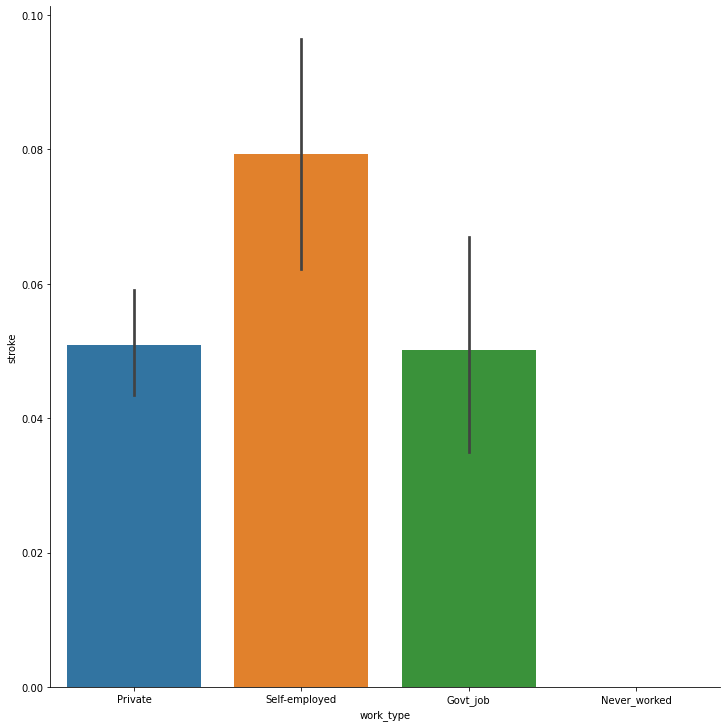

In [ ]:
#construction d'un histogramme
sns.catplot(x="work_type", y="stroke", data= dt[(dt['work_type']!='children')], kind="bar",height=10)

On cherche à savoir si le type de travail qu'effectue le patient est un facteur favorisant les AVC.

Ce graphique nous permet de poser les hypothèses suivantes :

- Pour les patients qui travaillent dans le privé, la moyenne est d'environ 0.05 sur 0.1 donc 50 % de chance de faire un AVC, l'écart-type est plutôt petit (barre noire relativement petite), ce qui veut dire que la moyenne est fiable.

- Pour les patients qui travaillent dans au gouvernement, la moyenne est d'environ 0.05 sur 0.1 donc 50 % de chance de faire un AVC, l'écart-type est plutôt grand (barre barre noire relativement grande), ce qui veut dire que la moyenne n'est pas fiable. Il y a entre 30 et 70% de chance de faire un AVC lorsque l'on travaille au gouvernement.

- Pour les patients qui travaillent en tant qu'indépendant, la moyenne est d'environ 0.08 sur 0.1 donc 80 % de chance de faire un AVC, l'écart-type est très fort (barre noir relativement grande), ce qui veut dire que la moyenne n'est pas fiable. Il y a entre 60 et 100 % de chance de faire un AVC lorsque l'on travaille en tant qu'indépendant. Comparer aux autres types de travail, c'est celui-ci qui indique le plus fort taux de chance de faire un AVC.

- La population de personnes n'ayant jamais travaillé est trop faible pour déduire des résultats de ces sujets.

# Hypothèse numéro 7 : est-ce que l'hypertension est un facteur favorisant les AVC?

L'hypertension, correspond à une pression sanguine anormalement forte dans les artères. Ici, 0 signifie que le patient n'a pas d'hypertension et 1 signifie qu'il a de l'hypertension.


In [ ]:
dt.hypertension.describe()

count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

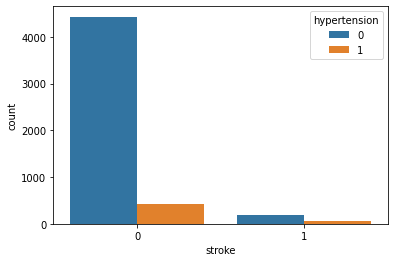

In [ ]:
sns.countplot(x=dt["stroke"], hue=dt["hypertension"])

Les personnes n'ayant pas d'hypertension sont peut etre plus nombreuse que celle qui en font dans notre échantillion, mais on constate que ces patients font quand même des AVC.
Nous pouvons donc pensé que l'hypertension n'est pas en corrélation pas les AVC et donc qu'il n'y pas un facteur favorisant les AVC. 

# Hypothèse numéro 8 : est-ce que le fait d'avoir une maladie cardiaque est un facteur favorisant les AVC ?

Pour rappel, il existe plusieurs types de maladie cardiaque (malformation, un apport de sang insuffisant ou un dysfonctionnement du muscle ou des valves cardiaques). Ici on identifi par 0 le fait que le patient n'a aucune maladie cardiaque et par 1 le fait qu'il en ait au moins une.

In [ ]:
dt.heart_disease.describe()

count    5110.000000
mean        0.054012
std         0.226063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64

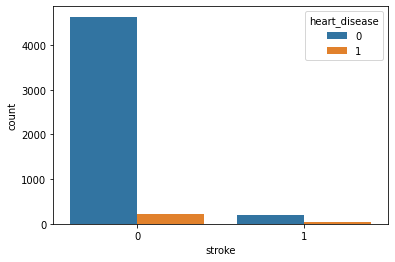

In [ ]:
sns.countplot(x=dt["stroke"], hue=dt["heart_disease"])

Le graphique nous permet d'observer qu'il n'y a pas de la corrélation entre les maladies cardiaques et les AVC car les gens qui n'ont pas des maladies cardiaques font quand même des AVC et probablement plus.

# Regardons la corrélation entre l'âge, l'hypertension, les maladies cardiaques, le taux de glucose dans le sang, l'indice de masse corporelle et les AVC. Afin de constater si les résultats trouvés précédemment sont correctes

In [ ]:
dt

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

In [ ]:
#sélectionner les colonnes utile:
corr = dt.loc[:,['age', 'hypertension','heart_disease','avg_glucose_level','bmi','stroke']].corr()
corr

age  hypertension  ...       bmi    stroke
age                1.000000      0.276398  ...  0.333398  0.245257
hypertension       0.276398      1.000000  ...  0.167811  0.127904
heart_disease      0.263796      0.108306  ...  0.041357  0.134914
avg_glucose_level  0.238171      0.174474  ...  0.175502  0.131945
bmi                0.333398      0.167811  ...  1.000000  0.042374
stroke             0.245257      0.127904  ...  0.042374  1.000000

[6 rows x 6 columns]

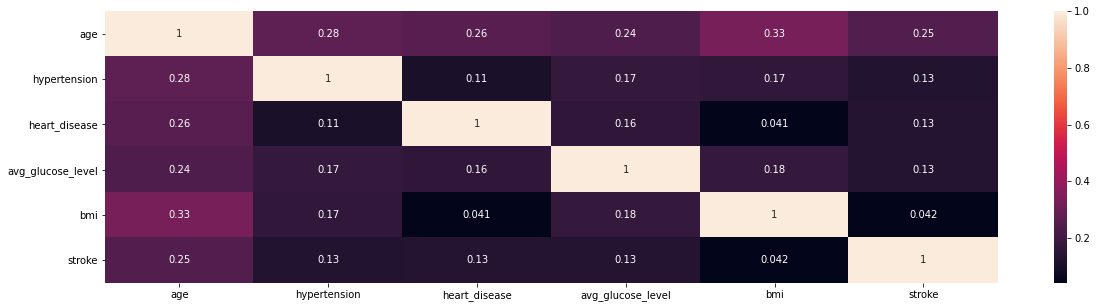

In [ ]:
#construction de la heatmap
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)
plt.savefig('heatmapProjet.png')

Cette heatmap nous est utile, car elle nous permet de regarder les corrélations qu'il y a entre les données numériques d'âge, hypertension, heart_disease, avg_glucose_level et bmi avec stroke (AVC).

On sait que plus la valeur est proche de 1 (ou -1) plus cela signifie qu'il y a une forte corrélation entre les deux valeurs et donc que la donnée étudier est un facteur favorisant les AVC.

On constate sur la ligne stroke, que l'âge à la plus grande "corrélation" avec les AVC (0.25) ce qui est très faible pour une corrélation. On dit généralement qu'il y a une corrélation significative quand la corrélation est supérieure à 0.6, or aucune donnée de cette heatmap ne dépassent les 0.6, **ce qui veut dire qu'aucune données de cette heatmap est un facteur significatif favorisant les AVC**.
L'hypertension, les maladies cardiaques et le taux de glucose dans le sang sont à 0.13 pour ce qui est encore plus faible que 0.25 et indique que la corrélation n'est pas significative. L'indice de masse corporel a une corrélation de 0.042 avec les AVC, ce qui signifie qu'il n'y a quasiment aucune corrélation entre les deux données.



# Conclusion : 



Les données présentes ne permettent pas de déterminer un ou des facteurs significatifs favorisant les AVC. Ce qui paraît étonnant au vu de la nature des facteurs étudiés (on pourrait facilement pensé qu'un surpoids est un facteur favorisant les AVC).Néanmoins, ces résultats sont à pondérer par la présence de données dépendantes entre elles et l'absence de contexte dans la prise des valeurs étudiées. On constate aussi que les données sur les maladies cardiaques et l'hypertension qu'on pourrait pensé facteurs aggravant des AVC ne le sont pas non plus. La seule donnée qui à su montré une corrélation intéressante est l'âge mais elle est trop peu significative pour en tiré des conclusions.
